# <center><font color='purple'>GROUP A</font></centre>

### <font color='purple'>OBJECTIVES</font>
    Solve a real world problem using skills learned during the Malawi data Science bootcamp

### <font color='purple'>DATASET SOURCE</font>
    https://www.kaggle.com

### <font color='purple'>BACKGROUND</font>
    Insurance companies are a huge help when it comes to covering medical bills of its members, but like any form of business, they need to make profits in order to stay in business, pay their employees and carry out their services effectively.

    Insurance companies in Malawi like masm have their owns set of rules they follow when taking on a new customer, for example, Masm doesnt allow people above 60 to sign up, probably because they know those people have many health issues and as new customers it would be a loss.To come up with such rules, they probably did some research over data collected over some long periods and made informed decisons using that data.

    The data set we will be loooking at is for an insurance company trying to determine a number of factors that affect the payments they make to their clients,we will assume this data has been collected over a period of time and management wants us to make informed decisions out of it to help the company stratergically improve its business. 

    In this presentation, we will explain the data, identify the relashionships between the features of the data using visualisation,  and then finally using Linear regression create a model that best fits our data so we can use it to make predictions about the data.

### <font color='purple'>Step 1 : Importing libraries</font>
    we use python because it comes with almost all the built in functions we would neeed to analyse, clean, visualise and work with our data 
    1.The numpy libray is used for almost all mathematical functions you would ever need
    2.Pandas for data analysis and manipulation
    3.Matplotlib for plotting graphs
    4.Seaborn is also used for visualisation and data analysis
    5.Statsmodels for statistical analysis of data

In [154]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import seaborn as sns
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
import statsmodels.formula.api as smf


### <font color='purple'>Step 2: Importing the dataset we will use</font>
    Note that we are using an offline csv file, a source can be from anywhere, online, offline and webscraping, just make sure that data you are using is clean.

In [155]:
df = pd.read_csv('insurance.csv')
data = pd.read_csv('insurance.csv')

### <font color='purple'>Step 3: Preprocessing our data</font>
    This Helps give us a picture of the data we are using

In [156]:
#shows just the first 5 items in the dataset, can also use tail().
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [157]:
#a description of the data, showing the shape, dimensions,and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [158]:
#null values, choose depending on choice to deal with them or not
df.isnull().count()

age         1338
sex         1338
bmi         1338
children    1338
smoker      1338
region      1338
charges     1338
dtype: int64

### <font color='purple'>More details about our dataset</font>

    Notice some info does not make sence, eg sex and smokers...because the answers are yes or no, imposible to find a mean of that kind of string data so python automatically excludes those fields when we use the describe function as you can see below. To include them in, we must change their values into more quantifiable form

In [159]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


In [160]:
#we change their values to a binary 1 or o
df.smoker.replace(('yes', 'no'), (1, 0), inplace=True)
df.sex.replace(('female', 'male'), (1, 0), inplace=True)


In [161]:
df.describe()

,age,sex,bmi,children,smoker,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.494768,30.663397,1.094918,0.204783,13270.422265
std,14.049960,0.500160,6.098187,1.205493,0.403694,12110.011237
min,18.000000,0.000000,15.960000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.296250,0.000000,0.000000,4740.287150
50%,39.000000,0.000000,30.400000,1.000000,0.000000,9382.033000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,16639.912515
max,64.000000,1.000000,53.130000,5.000000,1.000000,63770.428010


### <font color='purple'>Step 4: Identify relationships about our data using visualisation</font>

    Fig1: The below figure tries to see the number of smokers in each region, and see if there is a pattern.information like this can be helpful to the insurance company

Text(0.5, 1.0, 'Smokers Per Region')

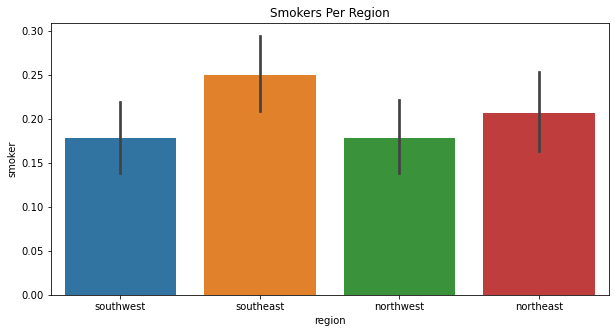

In [162]:
ax= plt.figure(figsize=(10,5))
sb.barplot(x='region', y='smoker', data=df)
plt.title('Smokers Per Region')

    Fig2: Shows how the age of a client affects the charges

Text(0.5, 1.0, 'Insurance Charges Per Age')

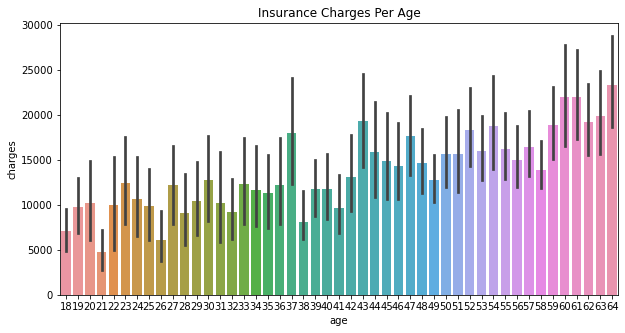

In [163]:
ax= plt.figure(figsize=(10,5))
sb.barplot(x='age', y='charges', data=df)
plt.title('Insurance Charges Per Age')

    Fig3: Shows how the BMI of the peolpe in our dataset is barely affected by age of the client.
            ### ideal BMI = 18.5 to 24.9, 
            ### >24.9 over weight & >30 to 34.9 Obese
            ### <20 under weight

Text(0.5, 1.0, 'BMI and Age')

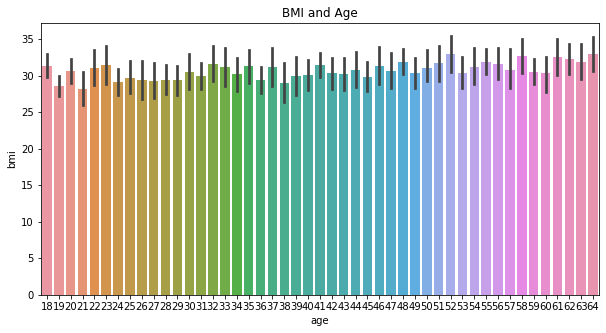

In [164]:
ax= plt.figure(figsize=(10,5))
sb.barplot(x='age', y='bmi', data=df)
plt.title('BMI and Age')

    Fig4: BMI of client to charges, and as we can see, clients with higher bmi tend to pay more charges.

Text(0.5, 1.0, 'Compare charges based on bmi level')

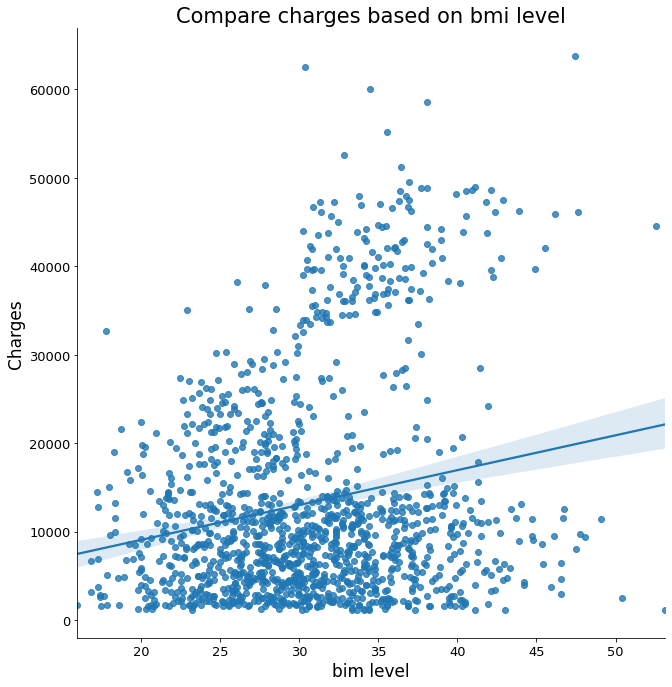

In [165]:
sns.lmplot(data=df,x="bmi",y="charges",height=9)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.xlabel("bim level",fontsize=17)
plt.ylabel("Charges",fontsize=17)
plt.title("Compare charges based on bmi level",fontsize=21)

    Fig5: See Charges Per Region

Text(0.5, 1.0, 'Charges and region')

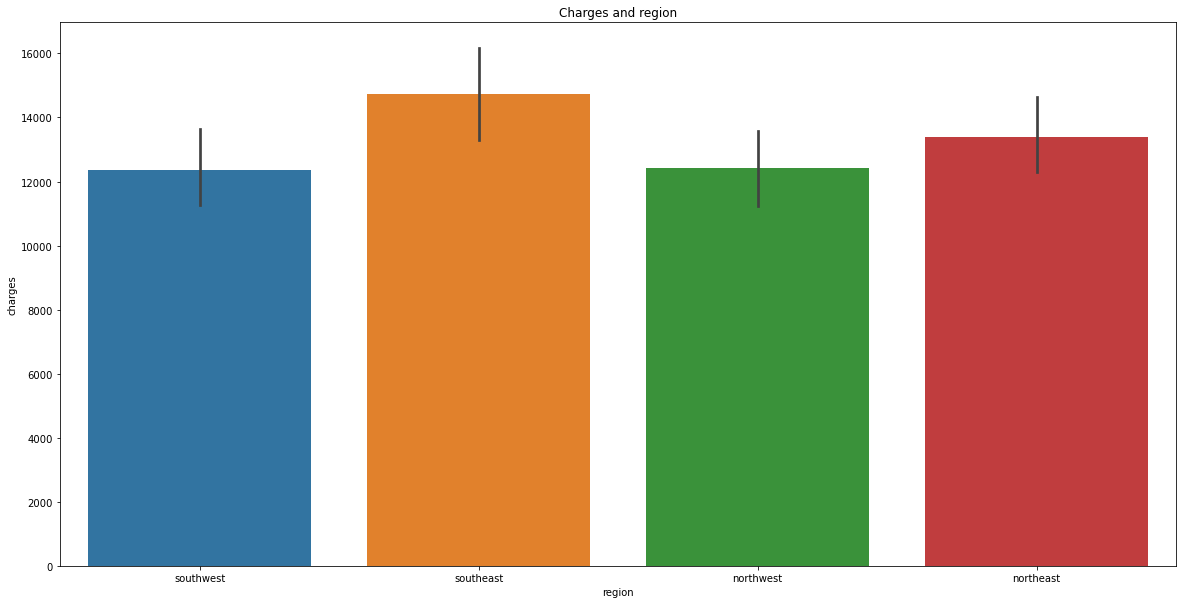

In [166]:
ax= plt.figure(figsize=(20,10))
sb.barplot(x='region', y='charges', data=df)
plt.title('Charges and region')

# <font color='purple'>DATA INTERPRETATION</font>

### <font color='purple'>Step 5:Multiple Linear Regression</font>

In [167]:
# Here we decide to drop the region column for analysis since we found out it doesnt really affect our results
data.drop(['region'], axis =1, inplace=True)


In [168]:
data.smoker.replace(('yes', 'no'), (1, 0), inplace=True)
data.sex.replace(('male', 'female'), (1, 0), inplace=True)

In [169]:
# Creating a multiple linear regression model using scikit-learn 

# create X and y
feature_cols = ['age','sex','bmi','children','smoker']
X = data[feature_cols]
y = data.charges

# instantiate and fit
linreg = LinearRegression()
linreg.fit(X, y)

# print the coefficients
print(linreg.intercept_)
print(linreg.coef_)

-12052.46198566474
[  257.73498767  -128.63985357   322.36421449   474.41112061
 23823.39253065]


In [170]:
# Pairing the feature names with the coefficients
zipped = zip(feature_cols, linreg.coef_)
list(zipped)

[('age', 257.734987669245),
 ('sex', -128.63985356970005),
 ('bmi', 322.3642144860739),
 ('children', 474.41112061269064),
 ('smoker', 23823.392530652625)]

### <font color='purple'>P Values</font>
    In statistics, the p-value is the probability of obtaining results at least as extreme as the observed results of a statistical hypothesis test, assuming that the null hypothesis is correct. A smaller p-value (<0.05) means that there is stronger evidence in favor of the alternative hypothesis.

In [171]:
# Using statsmodels to create a fitted model with all five features

LinModel = smf.ols(formula='charges ~ age + sex + bmi + children + smoker', data=data).fit()

# Printing the p-values for the model coefficients. The p-value < 0.05 implies that the feature in question
# has a positive effect on charges

print(LinModel.pvalues)

Intercept    8.099035e-35
age          2.593679e-89
sex          6.996412e-01
bmi          1.954711e-30
children     5.967197e-04
smoker       0.000000e+00
dtype: float64


  ### <font color='purple'>R-Squared</font>
    R-squared is a goodness-of-fit measure for linear regression models
    It tells us how well the model we have created fits the data
    In general, the higher the R-squared, the better the model fits our data.
    in this case as seen below. our model fits our data well.
    the rsquared value of 0.7 is greater than 0.5.
    rsquared values of less than 0.5 are an indication that the model we are using is not a good fit for our data.

In [172]:
# R-squared value for the model with five features
LinModel = smf.ols(formula='charges ~ age + sex + bmi + children + smoker', data=data).fit()
LinModel.rsquared

0.7497225098709179

In [173]:
# R-squared value for the model with four features
LinModel = smf.ols(formula='charges ~ age + bmi + children + smoker', data=data).fit()
LinModel.rsquared

0.749694530346479